In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Load the datasets
training_data = pd.read_csv('twitter_training.csv')
validation_data = pd.read_csv('twitter_validation.csv')

In [ ]:
data

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",cleaned_text,sentiment_score,categorized_sentiment,tweet_length
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN,24010,0.0,neutral,5
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN,24010,0.0,neutral,5
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN,24010,0.0,neutral,5
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN,24010,0.0,neutral,5
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN,24010,0.0,neutral,5
...,...,...,...,...,...,...,...,...,...,...,...,...
69425,NaN,NaN,NaN,NaN,4891.0,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,nan,0.0,neutral,3
69426,NaN,NaN,NaN,NaN,4359.0,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,nan,0.0,neutral,3
69427,NaN,NaN,NaN,NaN,2652.0,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,nan,0.0,neutral,3
69428,NaN,NaN,NaN,NaN,8069.0,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,nan,0.0,neutral,3


In [ ]:
validation_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
data.shape

(69430, 12)

In [ ]:
data.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,', '3364',
       'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣',
       'cleaned_text', 'sentiment_score', 'categorized_sentiment',
       'tweet_length'],
      dtype='object')

In [ ]:
data.describe(include = 'all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",cleaned_text,sentiment_score,categorized_sentiment,tweet_length
count,68431.000000,68431,68431,67829,999.000000,999,999,999,69430,69430.0,69430,69430.000000
unique,NaN,30,4,63704,NaN,32,4,998,11407,NaN,1,NaN
top,NaN,Microsoft,Negative,,NaN,RedDeadRedemption(RDR),Neutral,Wow,nan,NaN,neutral,NaN
freq,NaN,2400,20862,149,NaN,40,285,2,999,NaN,69430,NaN
mean,6250.348658,NaN,NaN,NaN,6435.159159,NaN,NaN,NaN,NaN,0.0,NaN,5.080542
std,3760.726322,NaN,NaN,NaN,3728.912226,NaN,NaN,NaN,NaN,0.0,NaN,0.604033
min,1.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,NaN,2.000000
25%,2930.000000,NaN,NaN,NaN,3241.500000,NaN,NaN,NaN,NaN,0.0,NaN,5.000000
50%,6161.000000,NaN,NaN,NaN,6560.000000,NaN,NaN,NaN,NaN,0.0,NaN,5.000000
75%,9463.000000,NaN,NaN,NaN,9662.500000,NaN,NaN,NaN,NaN,0.0,NaN,5.000000


In [6]:
# Rename columns for clarity
training_data.columns = ['Index', 'Topic', 'Sentiment', 'Tweet']
validation_data.columns = ['Index', 'Topic', 'Sentiment', 'Tweet']

In [7]:
# Combine the datasets
combined_data = pd.concat([training_data, validation_data], ignore_index=True)

In [8]:
# Clean the data by removing rows with missing tweet text
cleaned_data = combined_data.dropna(subset=['Tweet'])

In [9]:
# Analyze the sentiment distribution
sentiment_counts = cleaned_data['Sentiment'].value_counts()

<ipython-input-10-d2d5f6dc1503>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


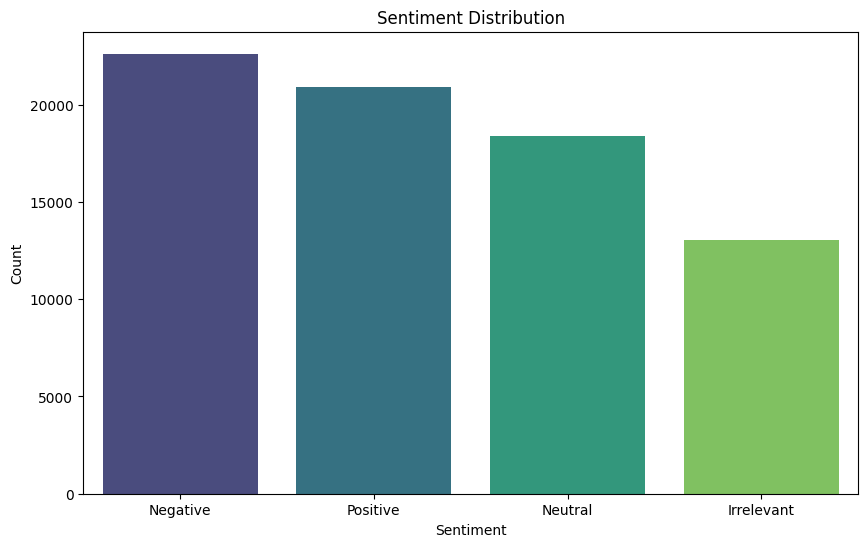

In [10]:
# Plot the sentiment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

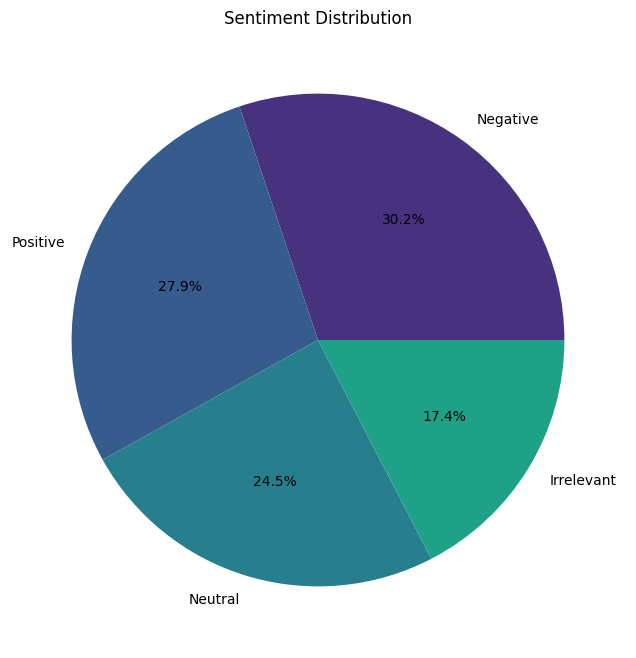

In [11]:
# Plot the sentiment distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Sentiment Distribution')
plt.show()

In [12]:
# Analyze topic-wise sentiment distribution
topic_sentiment_counts = cleaned_data.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)

<Figure size 1200x800 with 0 Axes>

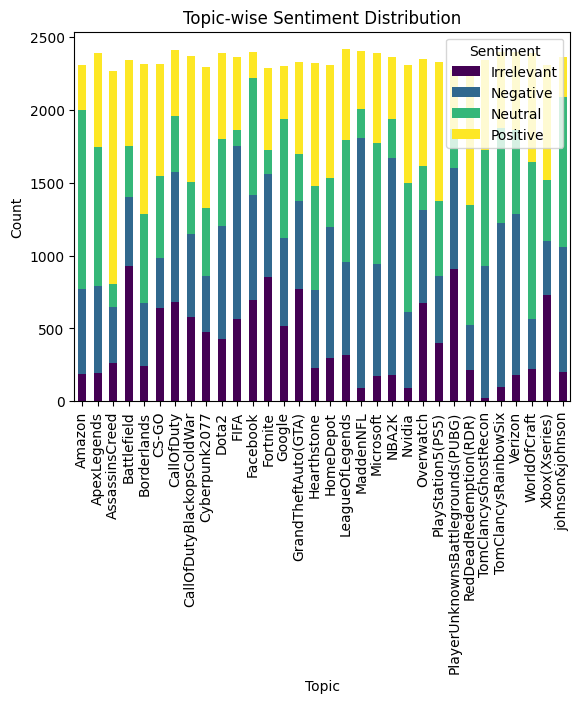

In [13]:
# Plot topic-wise sentiment distribution
plt.figure(figsize=(12, 8))
topic_sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Topic-wise Sentiment Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<Figure size 1200x800 with 0 Axes>

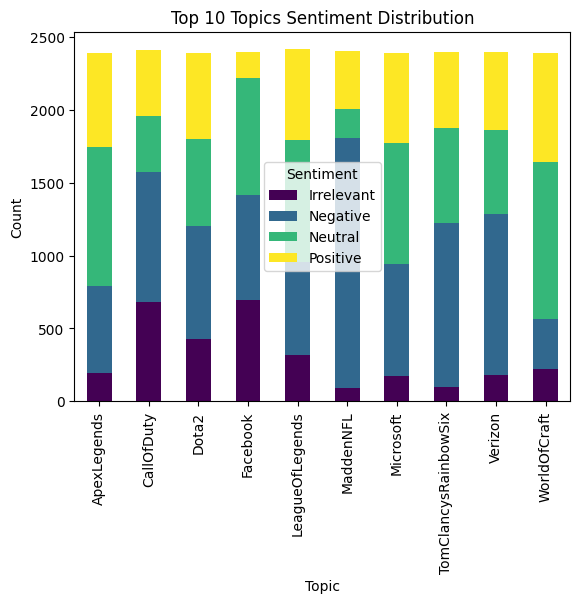

In [14]:
# Plot sentiment distribution for the top 10 topics
top_10_topics = cleaned_data['Topic'].value_counts().nlargest(10).index
top_10_data = cleaned_data[cleaned_data['Topic'].isin(top_10_topics)]
top_10_topic_sentiment_counts = top_10_data.groupby(['Topic', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
top_10_topic_sentiment_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Top 10 Topics Sentiment Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

<ipython-input-15-bf86135a8038>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Tweet_Length'] = cleaned_data['Tweet'].apply(len)


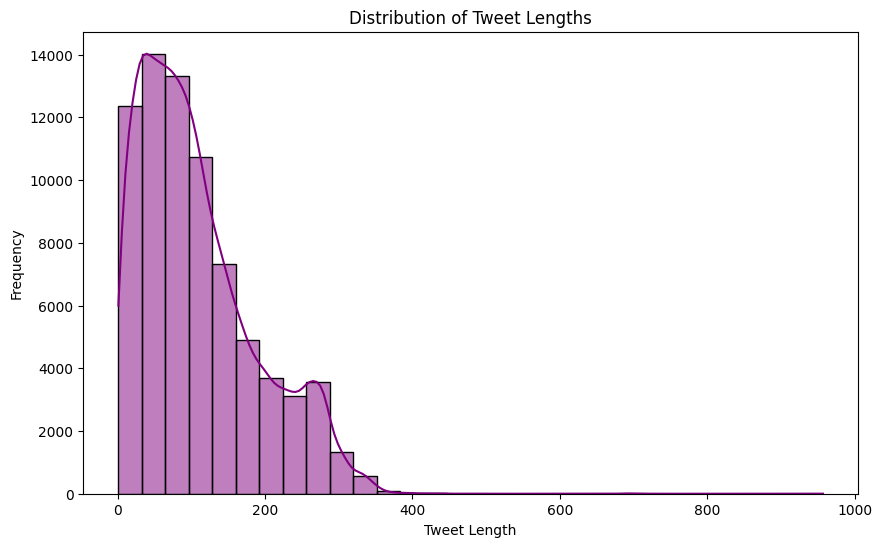

In [15]:
# Histogram of tweet lengths
cleaned_data['Tweet_Length'] = cleaned_data['Tweet'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Tweet_Length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-16-18b605a8b9d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Tweet_Length', data=cleaned_data, palette='viridis')


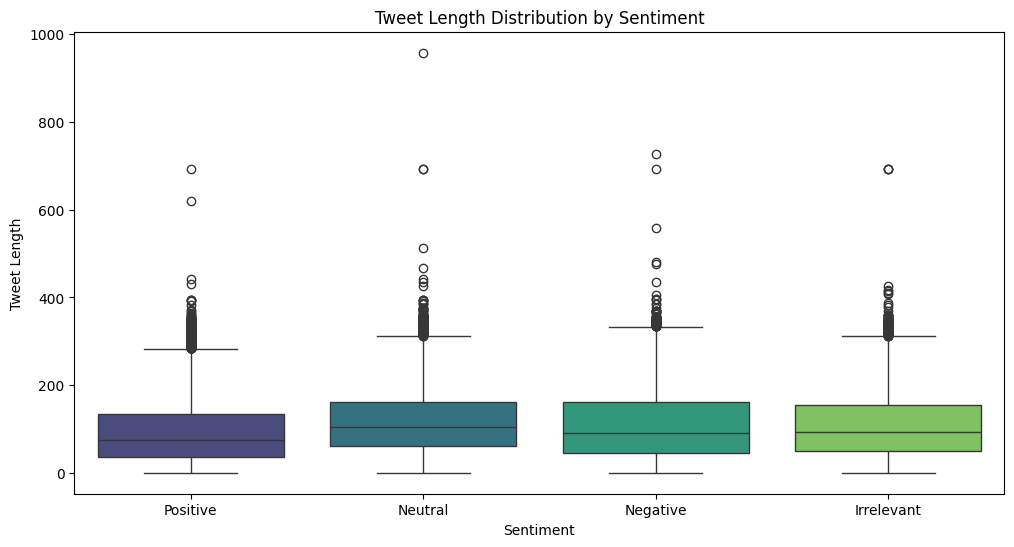

In [16]:
# Box plot of tweet lengths by sentiment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment', y='Tweet_Length', data=cleaned_data, palette='viridis')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

<ipython-input-18-0fb0cf666394>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Index'], unit='s')  # Assuming Index is a timestamp
<ipython-input-18-0fb0cf666394>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['DayOfWeek'] = cleaned_data['Date'].dt.day_name()


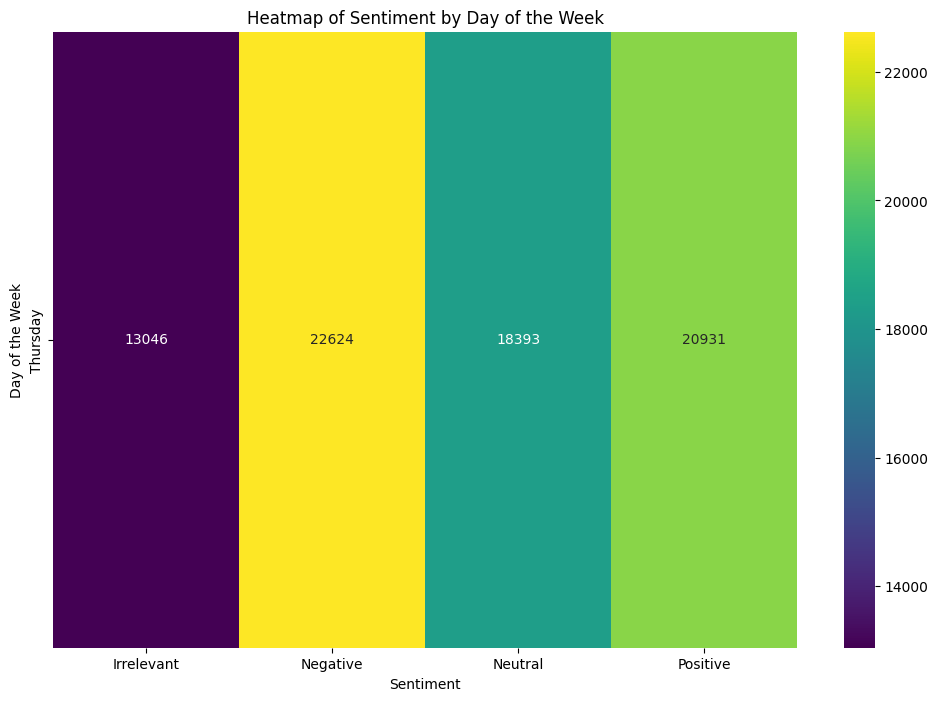

In [18]:
# Heatmap of sentiment by day of the week
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Index'], unit='s')  # Assuming Index is a timestamp
cleaned_data['DayOfWeek'] = cleaned_data['Date'].dt.day_name()
day_sentiment_counts = cleaned_data.groupby(['DayOfWeek', 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(day_sentiment_counts, annot=True, fmt='d', cmap='viridis')
plt.title('Heatmap of Sentiment by Day of the Week')
plt.xlabel('Sentiment')
plt.ylabel('Day of the Week')
plt.show()

<ipython-input-19-4d35da912fcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Date'] = pd.to_datetime(cleaned_data['Index'], unit='s')  # Assuming Index is a timestamp


<Figure size 1200x800 with 0 Axes>

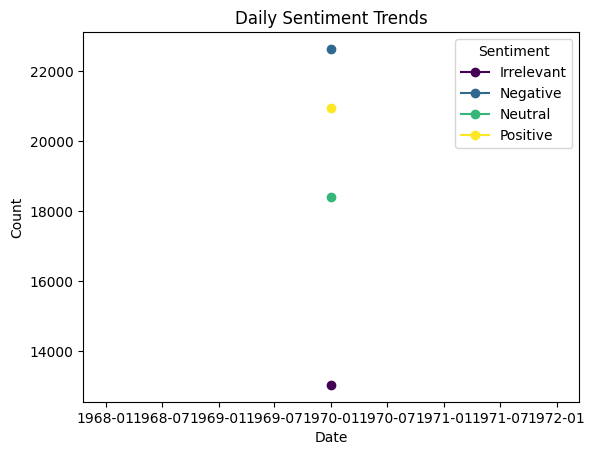

In [19]:
# Time series analysis of sentiment trends
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Index'], unit='s')  # Assuming Index is a timestamp
daily_sentiment_counts = cleaned_data.groupby([cleaned_data['Date'].dt.date, 'Sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
daily_sentiment_counts.plot(kind='line', marker='o', colormap='viridis')
plt.title('Daily Sentiment Trends')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


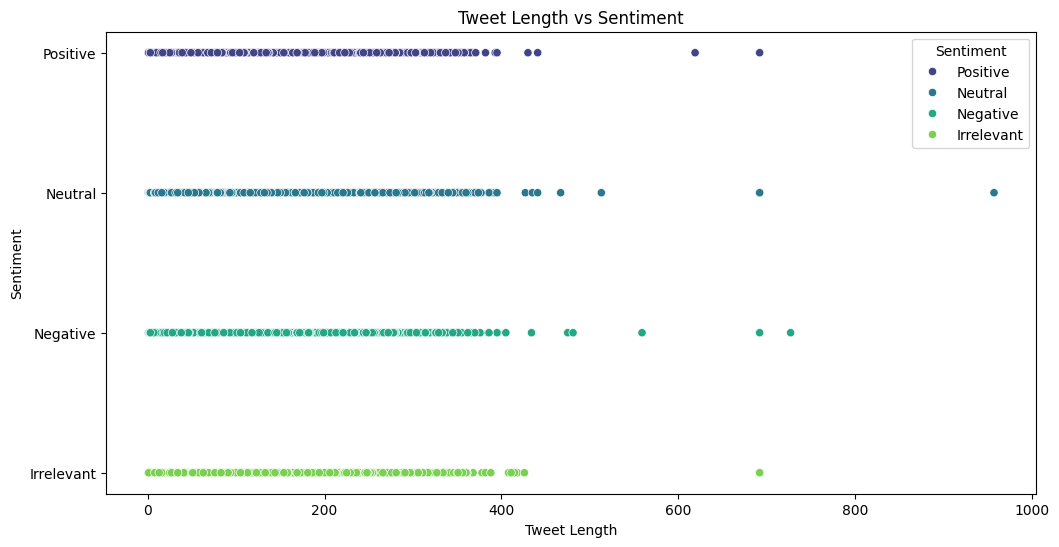

In [20]:
# Scatter plot of tweet length vs sentiment
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tweet_Length', y='Sentiment', data=cleaned_data, hue='Sentiment', palette='viridis')
plt.title('Tweet Length vs Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment')
plt.show()

<ipython-input-21-a91c81d13f07>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=training_sentiment_counts.index, y=training_sentiment_counts.values, palette='viridis', ax=axes[0])
<ipython-input-21-a91c81d13f07>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=validation_sentiment_counts.index, y=validation_sentiment_counts.values, palette='viridis', ax=axes[1])


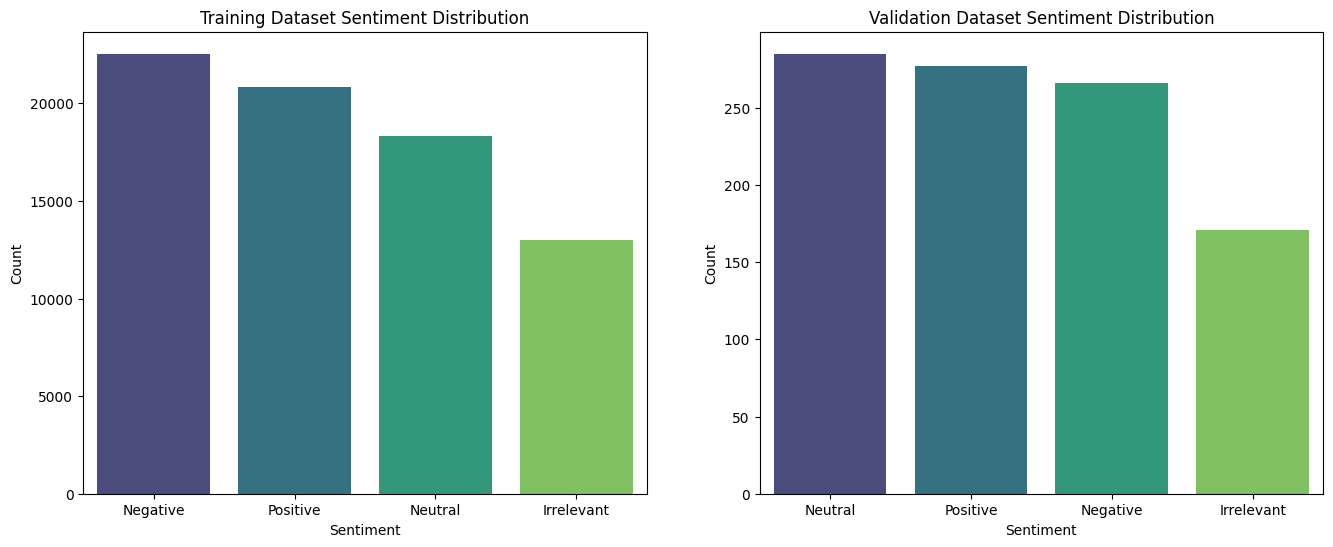

In [21]:

# Sentiment comparison between training and validation datasets
training_sentiment_counts = training_data['Sentiment'].value_counts()
validation_sentiment_counts = validation_data['Sentiment'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=training_sentiment_counts.index, y=training_sentiment_counts.values, palette='viridis', ax=axes[0])
axes[0].set_title('Training Dataset Sentiment Distribution')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Count')

sns.barplot(x=validation_sentiment_counts.index, y=validation_sentiment_counts.values, palette='viridis', ax=axes[1])
axes[1].set_title('Validation Dataset Sentiment Distribution')
axes[1].set_xlabel('Sentiment')
axes[1].set_ylabel('Count')

plt.show()

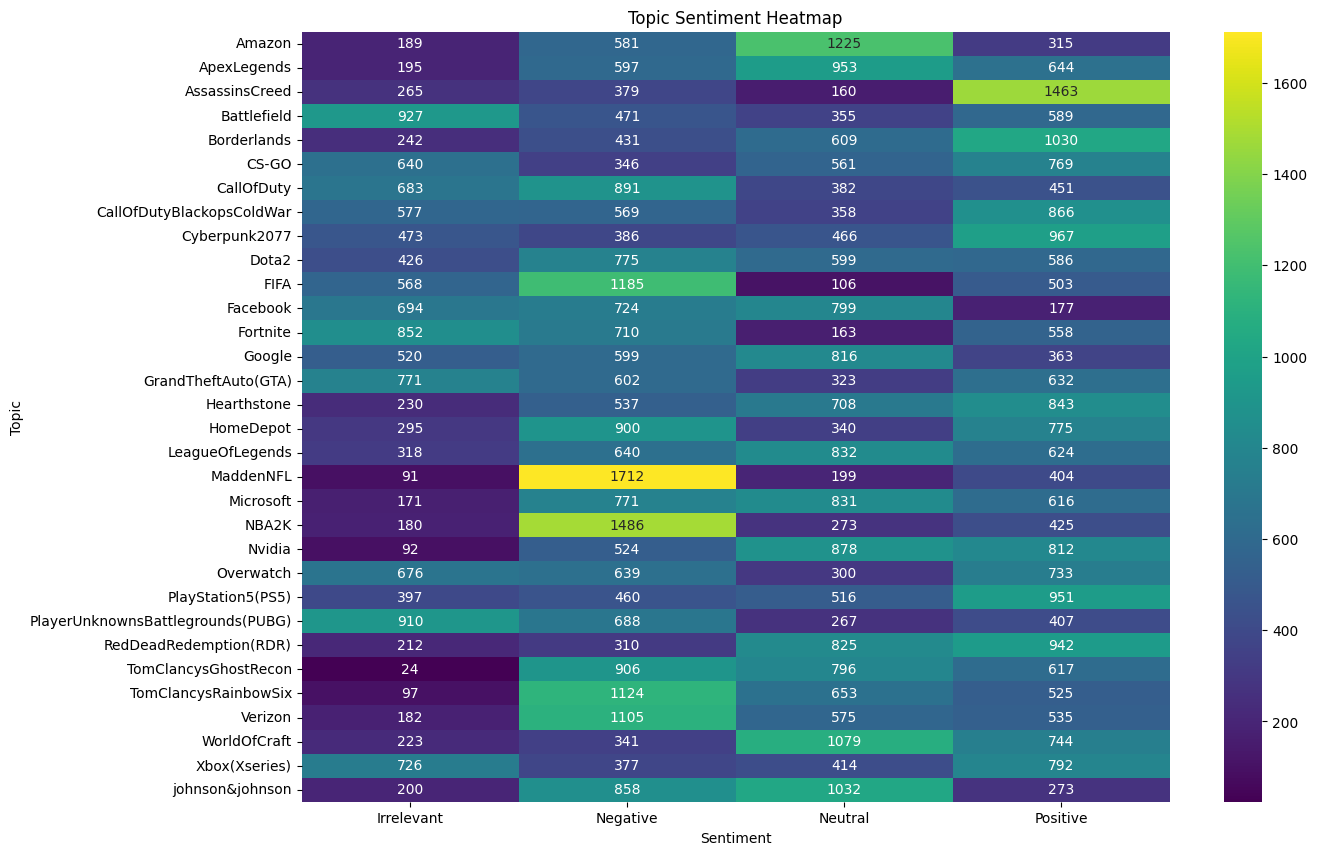

In [22]:
# Topic Sentiment Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(topic_sentiment_counts, annot=True, fmt='d', cmap='viridis')
plt.title('Topic Sentiment Heatmap')
plt.xlabel('Sentiment')
plt.ylabel('Topic')
plt.show()

<ipython-input-23-b26c68433222>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sentiment', y='Tweet_Length', data=cleaned_data, palette='viridis')


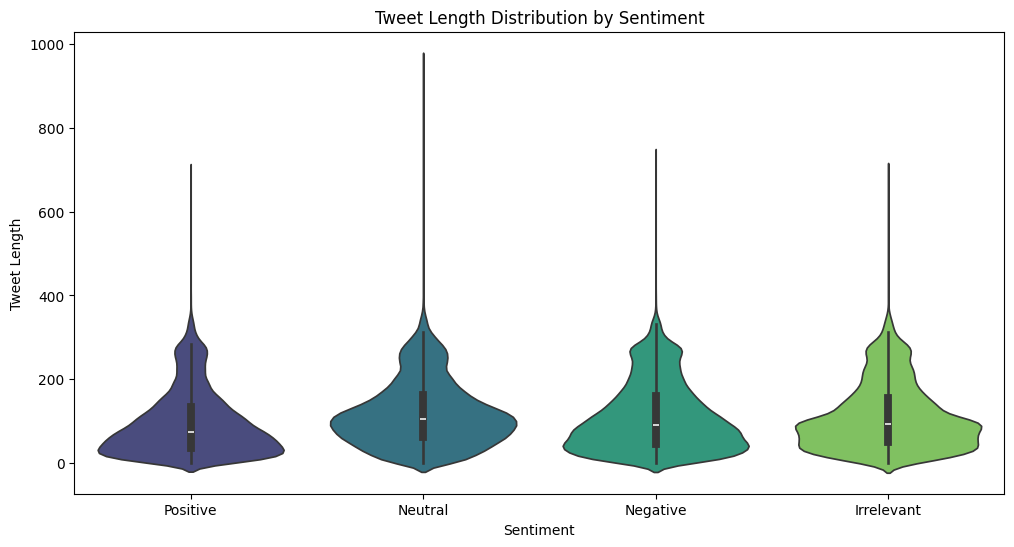

In [23]:
# Violin plot of tweet lengths by sentiment
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sentiment', y='Tweet_Length', data=cleaned_data, palette='viridis')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

<ipython-input-24-61bdfe6639e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_tweet_length_by_sentiment.index, y=avg_tweet_length_by_sentiment.values, palette='viridis')


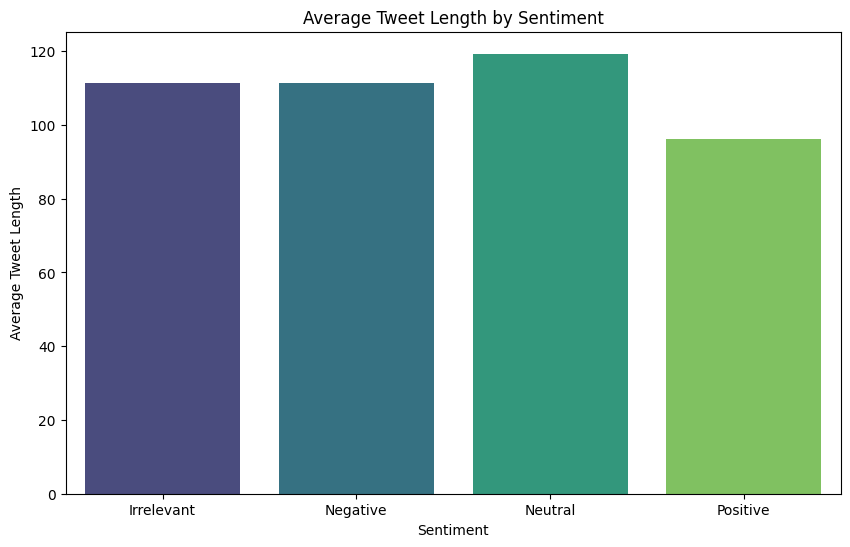

In [24]:
# Bar plot of average tweet length by sentiment
avg_tweet_length_by_sentiment = cleaned_data.groupby('Sentiment')['Tweet_Length'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_tweet_length_by_sentiment.index, y=avg_tweet_length_by_sentiment.values, palette='viridis')
plt.title('Average Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Tweet Length')
plt.show()


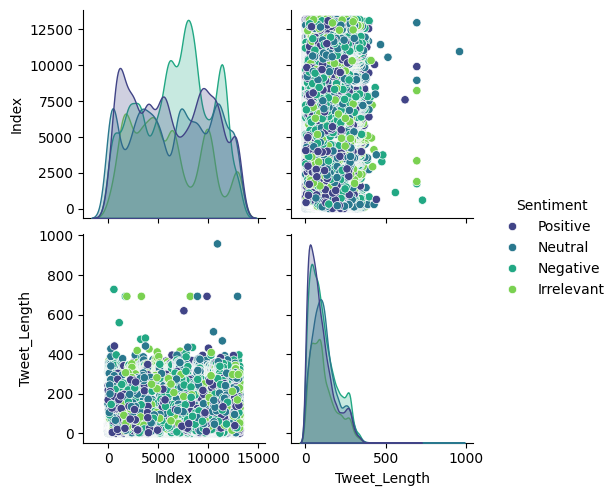

In [26]:
# Pair plot of sentiments
sns.pairplot(cleaned_data, hue='Sentiment', palette='viridis', diag_kind='kde')
plt.show()